### Copyright 2021 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Sorting an array using heapsort and output of some statistics

In [1]:
# this code contains counters for outputting statistics
# the counters are incremented after the action to be counted happened
def heapsort(a, outputStats=True):
    global exec_max_heapify, comparison_keys, exchange_keys
    # initialization of counters
    exec_max_heapify = 0
    comparison_keys = 0
    exchange_keys = 0
    # sorting begins here
    build_max_heap(a)
    for i in range(len(a)-1, 0, -1):
        a[0], a[i] = a[i], a[0]
        exchange_keys += 1
        max_heapify(a, i, 0)
    if outputStats:
        # output of counters, "# ..." means "number of ..."
        print(TEXT_SPACING, "# elements in array =", len(a))
        print(TEXT_SPACING, "# executions max_heapify =", exec_max_heapify)
        print(TEXT_SPACING, "# key comparisons =", comparison_keys)
        print(TEXT_SPACING, "# key exchanges =", exchange_keys)
    return a, exec_max_heapify, comparison_keys, exchange_keys

In [2]:
def build_max_heap(a):
    for i in range(len(a)//2, 0, -1):
        max_heapify(a, len(a), i-1)

In [3]:
def max_heapify(a, heapsize, i):
    global exec_max_heapify, comparison_keys, exchange_keys
    exec_max_heapify += 1
    left_child = 2*i + 1
    right_child = 2*i + 2
    if left_child < heapsize and a[left_child] > a[i]:
        maximum = left_child
    else:
        maximum = i
    if left_child < heapsize:
        comparison_keys += 1
    if right_child < heapsize and a[right_child] > a[maximum]:
        maximum = right_child
    if right_child < heapsize:
        comparison_keys += 1
    if maximum != i:
        a[i], a[maximum] = a[maximum], a[i]
        exchange_keys += 1
        max_heapify(a, heapsize, maximum)

## Global variables for easier information exchange between parts of algorithm

In [4]:
exec_max_heapify = 0
comparison_keys = 0
exchange_keys = 0

## Constants

In [5]:
# The size of elements in tests can be changed here
ARRAY_SIZE = 10
# Some output text
TEXT_BEFORE_SORTING = "Before sorting:"
TEXT_AFTER_SORTING = "After  sorting:"
TEXT_SPACING = " "*len(TEXT_BEFORE_SORTING)

## Generate test data and test algorithm

In [6]:
# test sorting sorted array
sorted_array = list(range(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, sorted_array)
print(TEXT_AFTER_SORTING, heapsort(sorted_array)[0])

Before sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                # elements in array = 10
                # executions max_heapify = 35
                # key comparisons = 41
                # key exchanges = 30
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
# test sorting reversly sorted array
reverse_sorted_array = list(range(ARRAY_SIZE-1, -1, -1))
print(TEXT_BEFORE_SORTING, reverse_sorted_array)
print(TEXT_AFTER_SORTING, heapsort(reverse_sorted_array)[0])

Before sorting: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
                # elements in array = 10
                # executions max_heapify = 26
                # key comparisons = 35
                # key exchanges = 21
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
# test sorting random array
# use numpy for generating a permutation
import numpy
# initialialize random number generator to obtain reproducable results
# other values might be used or even no initialization done here
numpy.random.seed(0)
# now generate random data and test sorting
array = list(numpy.random.permutation(ARRAY_SIZE))
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, heapsort(array)[0])

Before sorting: [2, 8, 4, 9, 1, 6, 7, 3, 0, 5]
                # elements in array = 10
                # executions max_heapify = 33
                # key comparisons = 39
                # key exchanges = 28
After  sorting: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### your tests here ...

In [9]:
# your test here ...
array = [1,3,2]
print(TEXT_BEFORE_SORTING, array)
print(TEXT_AFTER_SORTING, heapsort(array)[0])

Before sorting: [1, 3, 2]
                # elements in array = 3
                # executions max_heapify = 4
                # key comparisons = 3
                # key exchanges = 3
After  sorting: [1, 2, 3]


In [10]:
# ... and here ...

## Output of statistics to understand the behavior of algorithm

In [11]:
# for visualization we make use of pyplot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]
# used for comparison
import math

## Constants

In [12]:
# the values of the array sizes in tests can be changed here
ARRAY_SIZES = list(range(10,201,10))
# this factor is usef for scaling up the behavior
FACTOR_COMPARISON = 1000

## Functions for scaling down the functions' behavior

In [13]:
# these functions are used as parameters for plot_results to scale down the behavior
def no(x):
    # 1-function, additionally eliminate the automatically added factor
    return FACTOR_COMPARISON
def linear(x):
    return x
def linear_times_log2(x):
    return x * math.log(x,2)

## Plot some parameters and compare it with other behaviors

In [14]:
# create plot of number of elements and number of executions of max_heapify (green),
# number of key comparisons (blue), and key exchanges (red)
# the parameters are used for scaling down the graphical outputs for identification of the function growth
def plot_results(results, f1 = no, f2 = no, f3 = no):
    plt.figure(figsize=(15, 8))
    # plot functions without modification
    plt.plot([len(r[0]) for r in results],[r[1] for r in results], "go-")
    plt.plot([len(r[0]) for r in results],[r[2] for r in results], "bo-")
    plt.plot([len(r[0]) for r in results],[r[3] for r in results], "ro-")
    # plot functions to compare it with behavior given as parameters (same color, no dots)
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[1]/f1(len(r[0])) for r in results], "g-")
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[2]/f2(len(r[0])) for r in results], "b-")
    plt.plot([len(r[0]) for r in results],[FACTOR_COMPARISON*r[3]/f3(len(r[0])) for r in results], "r-")
    plt.xticks(ARRAY_SIZES)
    plt.grid(True)
    plt.show()

## Tests

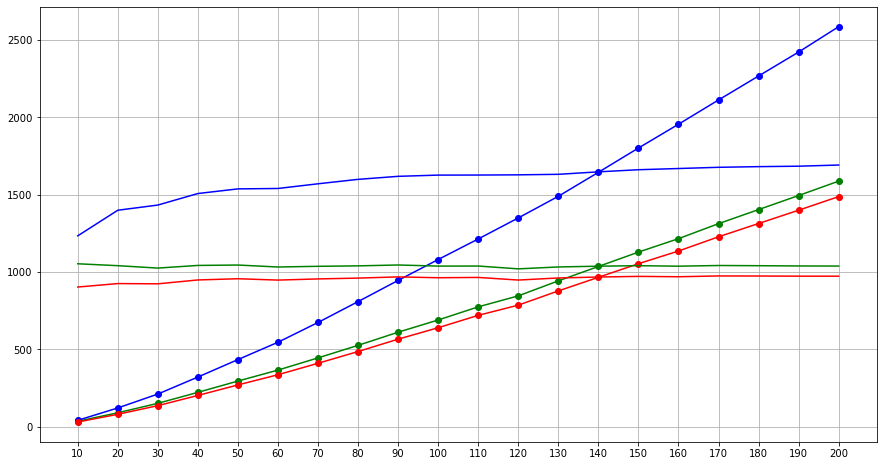

In [15]:
# test sorting sorted arrays
results = []
for i in ARRAY_SIZES:
    sorted_array = list(range(i))
    results.append(heapsort(sorted_array, outputStats=False))
plot_results(results, linear_times_log2, linear_times_log2, linear_times_log2)

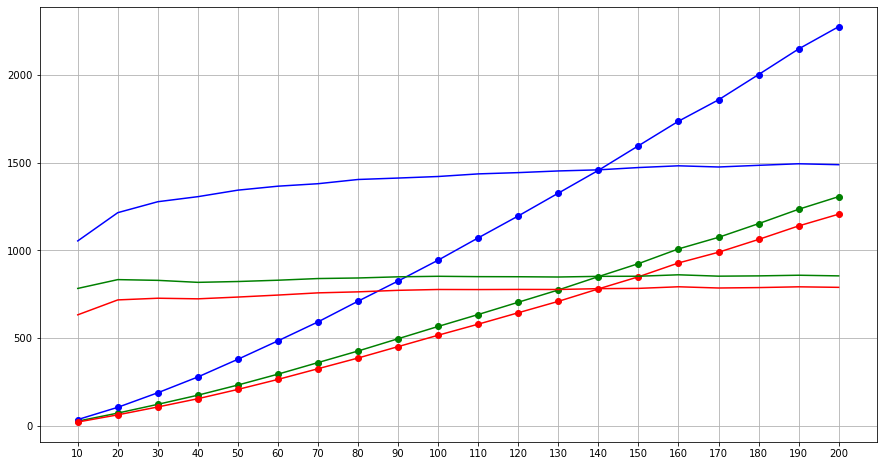

In [16]:
# test sorting reversly sorted arrays
results = []
for i in ARRAY_SIZES:
    reverse_sorted_array = list(range(i-1, -1, -1))
    results.append(heapsort(reverse_sorted_array, outputStats=False))
plot_results(results, linear_times_log2, linear_times_log2, linear_times_log2)

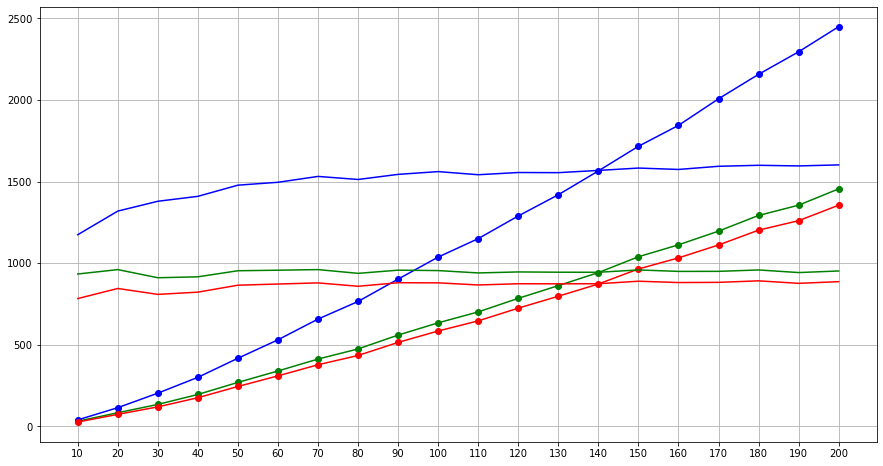

In [17]:
# test sorting random arrays
results = []
for i in ARRAY_SIZES:
    array = list(numpy.random.permutation(i))
    results.append(heapsort(array, outputStats=False))
plot_results(results, linear_times_log2, linear_times_log2, linear_times_log2)